In [21]:
from google.colab import drive
 
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


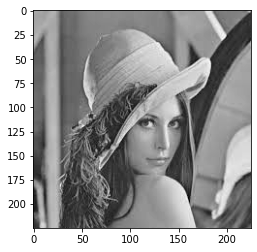

In [22]:
import numpy as np
import cv2 as cv
import random
import math
from matplotlib import pyplot as plt
import sys
sys.setrecursionlimit(10**9)
img_address = "drive/My Drive/Colab Notebooks/edge.jpeg"
img = cv.imread(img_address, 0)
[rows, columns] = np.shape(img)  
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [23]:
def sobel_filter(img):
  Kx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])  # x direction
  Ky = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])  # y direction
  Ex  = np.zeros(shape=(rows, columns)) 
  Ey  = np.zeros(shape=(rows, columns)) 
  tan_teta = np.zeros(shape=(rows, columns),dtype=float) 
  for i in range(1, rows - 1):
        for j in range(1, columns - 1):
            Ex[i, j] = np.sum(np.multiply(img[i - 1 : i + 2, j - 1 : j + 2], Kx))
            Ey[i, j] = np.sum(np.multiply(img[i - 1 : i + 2, j - 1 : j + 2], Ky))
  sobel_filter_img = np.sqrt(np.square(Ex) + np.square(Ey))
  angles = np.rad2deg(np.arctan2(Ey, Ex))
  angles[angles < 0] += 180
  fig=plt.figure(figsize=(16, 16))
  fig.add_subplot(1, 3, 1)
  plt.imshow(Ex, cmap=plt.get_cmap('gray'))
  plt.title("E horizontal image")
  fig.add_subplot(1, 3, 2)
  plt.imshow(Ey, cmap=plt.get_cmap('gray'))
  plt.title("E vertical image")
  fig.add_subplot(1, 3, 3)
  plt.imshow(sobel_filter_img, cmap=plt.get_cmap('gray'))
  plt.title("sobel filtered image")
  plt.show()
  return sobel_filter_img , angles

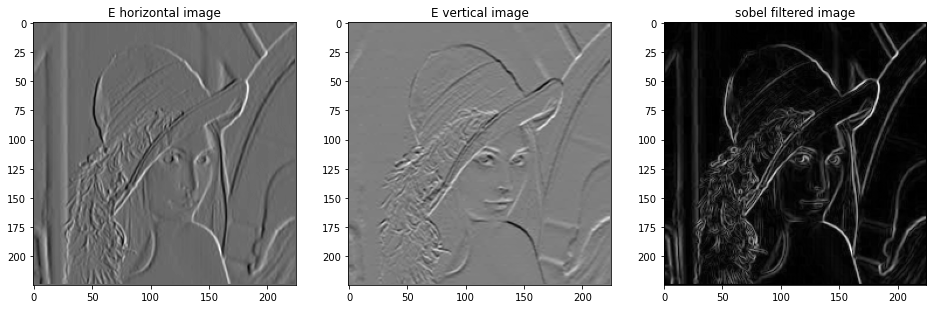

In [24]:
sobel_filter_img , angles = sobel_filter(img)

In [30]:
def non_maximum_suppression(image, angles):
    nms_img = np.zeros(shape=(rows, columns))
    for i in range(1, rows - 1):
        for j in range(1, columns - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                val = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                val = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                val = max(image[i - 1, j], image[i + 1, j])
            else:
                val = max(image[i + 1, j - 1], image[i - 1, j + 1])
            
            if image[i, j] >= val:
                nms_img[i, j] = image[i, j]
    fig=plt.figure(figsize=(16, 16))
    fig.add_subplot(1, 3, 1)
    plt.imshow(nms_img, cmap=plt.get_cmap('gray'))
    plt.title("non maximum suppression image")
    plt.show()
    nms_img = np.multiply(nms_img, 255.0 / nms_img.max())
    return nms_img

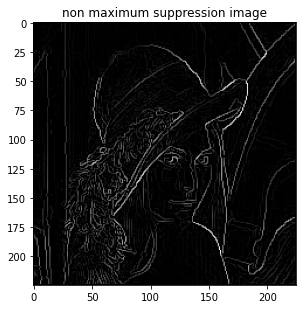

In [31]:
nms_img = non_maximum_suppression(sobel_filter_img, angles)